In [1]:
import numpy as np
import pandas as pd
import scipy,sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sys,os,pdb,copy,pickle
from importlib import reload
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')

from sklearn.decomposition import NMF
import nmf_analysis as na
import nmf_plot as nmfp

import plot_helper as ph

In [2]:
def create_data(n_neurons=100,n_trials=20,n_active_trials = 5,blockstart_trial_weights=None):
    X = np.zeros((n_neurons,n_trials))
    blockstart_trials = np.random.choice(np.arange(n_trials),size=n_neurons,p=blockstart_trial_weights)
    blockstart_trials=np.sort(blockstart_trials)
    if isinstance(n_active_trials,int):
        n_active_trials = np.ones(n_neurons,dtype=int)*n_active_trials
    for n in range(n_neurons):
        X[n,blockstart_trials[n]:blockstart_trials[n]+n_active_trials[n]] = 1.

    return X


In [3]:
def create_data_multiple_concentration(alpha_l = [0.01,0.1,1,10,100,1000],n_neurons=100,n_trials=20,n_active_trials = 5):
    X_d = {}
    n_to_start_trials = ntrials 
    for alpha in alpha_l:
        
        blockstart_trial_weights = np.random.dirichlet(np.ones(n_to_start_trials)*alpha)
        X_d[alpha] = create_data(n_neurons=n_neurons,n_trials=n_trials,n_active_trials=n_active_trials,blockstart_trial_weights=blockstart_trial_weights)
    
    return X_d


In [6]:
n_trials =20
n_active_trials = 5#20#5
n_neurons=100
alpha_l = [0.01,0.1,1,10,1000]

n_active_trials = np.random.randint(15,size=n_neurons) + 5
X_d=create_data_multiple_concentration(alpha_l=alpha_l,n_neurons=n_neurons,n_trials=n_trials,n_active_trials=n_active_trials)


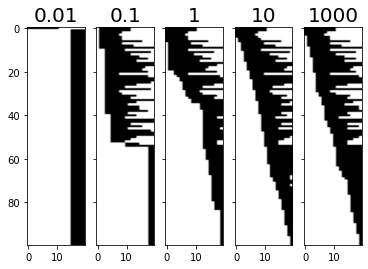

In [7]:
nplots = len(X_d)
fig,axs=plt.subplots(1,nplots,sharey=True,sharex=True)
for ii,(k,v) in enumerate(X_d.items()):
    axs[ii].imshow(v,aspect='auto')
    axs[ii].set_title(k)

In [10]:
n_compo_l = [2,3,4,5]
H_sorted_d = {}
W_d = {}
for k,v in X_d.items():

    for n_compo in n_compo_l:
        W, W_sorted,W_inds, factor_assignment, H_sorted, X_sorted, X_recon_sorted = na.nmf_and_sort(v, n_compo)
        W_d[(k,n_compo)] = W
        H_sorted_d[(k,n_compo)] = H_sorted

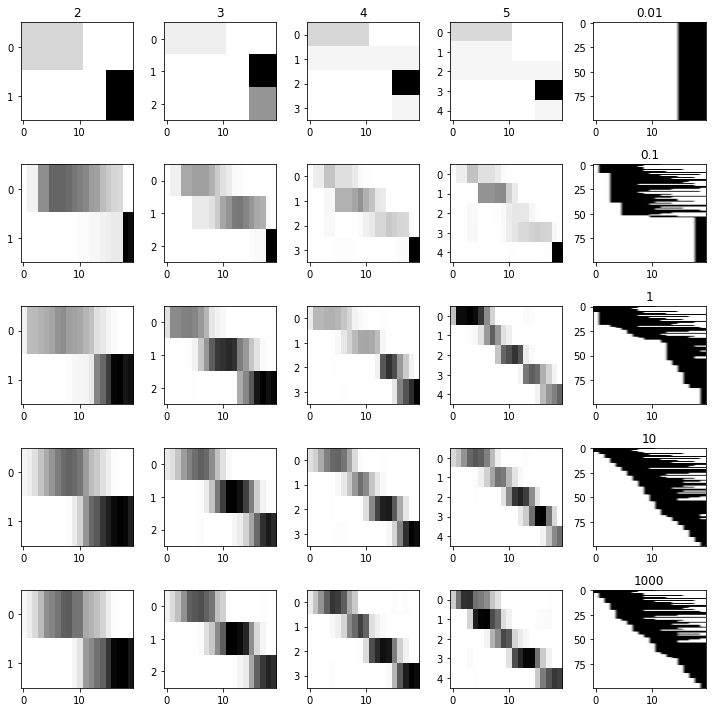

In [9]:
nplots = len(H_sorted_d)
# fig,axs=ph.subplots_wrapper(nplots,return_axs=True,sharex=True,sharey=True)
fig,axs = plt.subplots(len(alpha_l),len(n_compo_l)+1,figsize=(10,10))

for ii,alpha in enumerate(alpha_l):
    axs[ii,len(n_compo_l)].imshow(X_d[alpha],aspect='auto')
    axs[ii,len(n_compo_l)].set_title(alpha,fontsize=12)
    for jj,n_compo in enumerate(n_compo_l):
        H = H_sorted_d[(alpha,n_compo)]
        axs[ii,jj].imshow(H,aspect='auto')
        axs[ii,jj].set_yticks(np.arange(H.shape[0]))
        if ii==0:
            axs[ii,jj].set_title(n_compo,fontsize=12)
plt.tight_layout()
# for ii,(k,val) in enumerate(H_sorted_d.items()):
#     ax=axs.ravel()[ii]
#     ax.imshow(val,aspect='auto')
#     ax.set_title(k)
    

# real data

In [4]:
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp

import data_prep_pyn as dpp
import database

import pynapple as nap
db = database.db

In [5]:
data_dir_full=db.query('owner=="roman"')['data_dir_full'][0]
data_dir_full
db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
...                                                          ...   
e16_2m1     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e16_1f1     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     0  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
...                        ...           ...         ...   
e16_2m1     0   e16_2m1_201116       e16_2m1  2020-11-16   
e16_1f1     0   e16_1f1_200823       e16_1f1  2020-08-23   
            1   e16_1f1_200824       e16_1f1  2020-08-24   
e14_2m3     0   e14_2m3_201017       e14_2m3  2020-10-17   
            1   e14_2m3_201019       e14_2m3  2020-10-19   

                                    behavior  performance  ntrials  \
animal_name                                                          
e13_26m1    0                    alternation     0.956522       69   
e15_13f1    0                    alternation     0.617647       34   
            1   ['alternation' 'linearMaze']     0.740741       27   
            2  ['alternation' 'alternation']     0.721311       61   
            3   ['alternation' 'linearMaze']     0.800000       45   
...                                      ...          ...      ...   
e16_2m1     0                    alternation     0.636364       11   
e16_1f1     0                    alternation     0.631579       19   
            1                    alternation     0.571429       21   
e14_2m3     0                    alternation     0.615385       26   
            1                    alternation     0.863636       22   

               ngoodtrials  n_neurons  n_pyr_putative  owner   data_root  
animal_name                                                               
e13_26m1    0           69        482             422  roman  roman_data  
e15_13f1    0           34        376             333  roman  roman_data  
            1           27        363             318  roman  roman_data  
            2           61        343             288  roman  roman_data  
            3           45        303             248  roman  roman_data  
...                    ...        ...             ...    ...         ...  
e16_2m1     0           11         50              37  roman  roman_data  
e16_1f1     0           19         47              32  roman  roman_data  
            1           21         40              27  roman  roman_data  
e14_2m3     0           26         34              26  roman  roman_data  
            1           22         36              22  roman  roman_data  

[67 rows x 12 columns]

In [6]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0]

In [7]:
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
behavior=mat_to_return['behavior']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df'].as_dataframe()

load *SessionPulses.Events.mat failed


In [8]:
import nmf_one_session as nos

reload(nos)
n_compo=4
nmf_res = nos.nmf_one_session(data_dir_full,kwargs_={'n_compo':n_compo,'dosave':False,'doplots':False,'force_reload':False})


<module 'sys' (built-in)>
<module 'sys' (built-in)>
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/nmf/nmf_4.p already exists! Loading--


In [9]:
key = (0,0)
peak_inds=nmf_res['W_df_peaks_only_d'][key].index
X_normed_restacked_df_peaks_only = nmf_res['X_normed_restacked_df_d'][key].loc[peak_inds]

In [15]:
nmf_res['W_df_peaks_only_post_sorted_d'][key].index

MultiIndex([(0, 191, 1),
            (0, 221, 4),
            (0, 259, 7),
            (0, 149, 7),
            (0, 375, 4),
            (0, 284, 4),
            (0, 178, 2),
            (0,  85, 7),
            (0, 458, 5),
            (0, 122, 4),
            ...
            (3,  99, 7),
            (3, 308, 3),
            (3, 171, 5),
            (3, 338, 3),
            (3,  52, 1),
            (3, 233, 2),
            (3,  97, 1),
            (3, 232, 4),
            (3,  38, 4),
            (3, 334, 1)],
           names=['factor', None, 'lin_binned'], length=775)

In [28]:
com = na.get_com(X_normed_restacked_df_peaks_only)

inds_sorted=com.sort_values().index

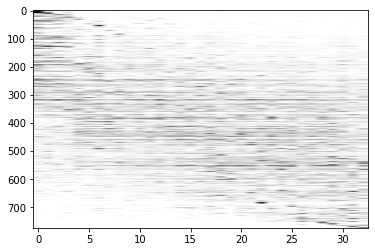

In [29]:
fig,ax=plt.subplots()
ax.imshow(X_normed_restacked_df_peaks_only.loc[inds_sorted],aspect='auto')

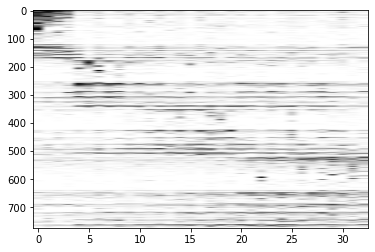

In [30]:
inds_sorted=nmf_res['W_df_peaks_only_post_sorted_d'][key].index
inds_sorted=pd.MultiIndex.from_arrays([inds_sorted.get_level_values(1),inds_sorted.get_level_values(2)])
fig,ax=plt.subplots()
ax.imshow(X_normed_restacked_df_peaks_only.loc[inds_sorted],aspect='auto')

<AxesSubplot:xlabel='None,lin_binned'>

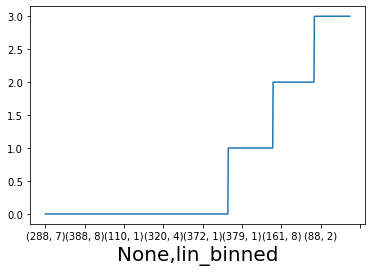

In [38]:
nmf_res['W_df_peaks_only_d'][key].sort_values(['clust','skew'])['clust'].plot()

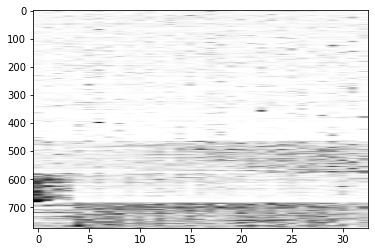

In [35]:
inds_sorted=nmf_res['W_df_peaks_only_d'][key].sort_values(['clust','skew']).index
fig,ax=plt.subplots()
ax.imshow(X_normed_restacked_df_peaks_only.loc[inds_sorted],aspect='auto')

In [45]:
import tsp
reload(tsp)

<module 'tsp' from '/mnt/home/szheng/projects/nmf_analysis/tsp.py'>

In [40]:
X_normed_restacked_df_peaks_only

trial               1.0       3.0       6.0       8.0       10.0      12.0  \
    lin_binned                                                               
1   7           0.000000  0.000000  1.000000  0.298701  0.000000  0.000000   
3   3           0.000000  0.000000  0.157895  0.000000  0.162162  0.000000   
27  1           0.196923  0.373333  0.682667  0.365714  0.685714  0.301176   
    7           0.590769  0.832000  0.528696  0.490390  0.544000  0.361739   
29  2           0.538462  0.538462  1.000000  0.866667  0.000000  0.187500   
...                  ...       ...       ...       ...       ...       ...   
478 1           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    4           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
479 6           0.000000  0.000000  0.000000  0.000000  0.277778  0.000000   
480 3           0.000000  0.032143  0.000000  0.000000  0.000000  0.085714   
    8           0.068878  0.562500  0.086873  0.576355  0.363354  0.794118   

trial               14.0      16.0      18.0      20.0  ...      49.0  \
    lin_binned                                          ...             
1   7           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
3   3           0.000000  0.000000  0.000000  0.382979  ...  0.342857   
27  1           0.675556  0.502857  0.443077  0.411429  ...  0.640000   
    7           0.592593  0.473043  0.666667  0.523636  ...  0.288000   
29  2           0.277778  0.142857  0.333333  0.583333  ...  0.529412   
...                  ...       ...       ...       ...  ...       ...   
478 1           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    4           0.000000  0.000000  0.589286  0.000000  ...  0.000000   
479 6           0.432099  0.000000  0.000000  0.000000  ...  0.000000   
480 3           0.000000  0.000000  0.000000  0.027356  ...  0.000000   
    8           0.231140  0.292948  0.296703  0.391304  ...  0.631169   

trial               51.0      53.0      55.0      57.0      59.0      61.0  \
    lin_binned                                                               
1   7           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   3           0.363636  0.473684  0.576923  0.600000  0.666667  0.562500   
27  1           0.731429  0.760000  0.552727  0.520000  0.600000  0.810667   
    7           0.735319  0.665098  0.640000  0.605405  0.467692  0.204800   
29  2           0.533333  0.722222  0.625000  0.375000  0.187500  0.125000   
...                  ...       ...       ...       ...       ...       ...   
478 1           0.000000  0.515625  0.000000  0.000000  0.000000  0.000000   
    4           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
479 6           0.051338  0.116521  0.000000  0.000000  0.000000  0.000000   
480 3           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    8           0.339089  0.239574  0.332512  0.721254  0.302521  1.000000   

trial               63.0      65.0      68.0  
    lin_binned                                
1   7           0.000000  0.000000  0.000000  
3   3           0.292683  0.311688  0.750000  
27  1           0.384000  0.361739  0.298667  
    7           0.504242  0.524444  0.560000  
29  2           0.400000  0.333333  0.384615  
...                  ...       ...       ...  
478 1           0.000000  0.000000  0.000000  
    4           0.000000  0.000000  0.000000  
479 6           0.000000  0.000000  0.000000  
480 3           0.000000  0.000000  0.032143  
    8           0.741758  0.000000  0.152847  

[775 rows x 33 columns]

In [42]:
from scipy.spatial.distance import pdist, squareform


array([[0.        , 2.55961143, 3.30740358, ..., 1.2387316 , 1.06993686,
        2.72406561],
       [2.55961143, 0.        , 2.13900148, ..., 2.29890158, 2.39530698,
        2.12178164],
       [3.30740358, 2.13900148, 0.        , ..., 3.19277887, 3.34121922,
        1.88065593],
       ...,
       [1.2387316 , 2.29890158, 3.19277887, ..., 0.        , 0.64931831,
        2.51536885],
       [1.06993686, 2.39530698, 3.34121922, ..., 0.64931831, 0.        ,
        2.54062813],
       [2.72406561, 2.12178164, 1.88065593, ..., 2.51536885, 2.54062813,
        0.        ]])

In [62]:
dist_euclid_full = squareform(ssd.pdist(X_normed_restacked_df_peaks_only))
dist_euclid_w = squareform(ssd.pdist(nmf_res['W_df_peaks_only_d'][key]))
# dist_corr_w = squareform(ssd.pdist(nmf_res['W_df_peaks_only_d'][key],'correlation'))
# dist_corr_full=squareform(ssd.pdist(X_normed_restacked_df_peaks_only,'correlation'))

In [67]:
dist = dist_euclid_w#dist_corr_full#dist_euclid_full
path,cost_hist=tsp.solve_tsp(dist)

KeyboardInterrupt: 

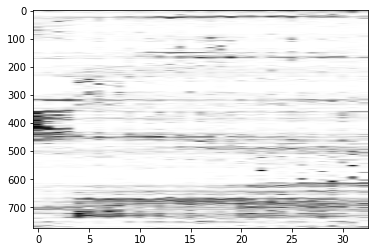

In [55]:
fig,ax=plt.subplots()
ax.imshow(X_normed_restacked_df_peaks_only.iloc[path],aspect='auto')

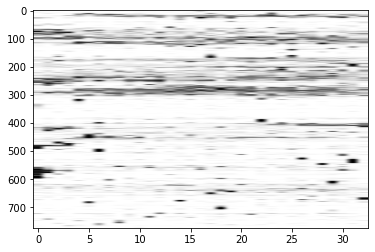

In [49]:
fig,ax=plt.subplots()
ax.imshow(X_normed_restacked_df_peaks_only.iloc[path],aspect='auto')

In [100]:
# want to see if the change points indeed happen at similar trials on the level of each individual neuron

In [106]:
import ruptures as rpt
import test_contiguous_instability as tci
reload(tci)

<module 'sys' (built-in)>


<module 'test_contiguous_instability' from '/mnt/home/szheng/projects/nmf_analysis/scripts/test_contiguous_instability.py'>

In [107]:

%time instab_res=tci.test_contiguous_instability(data_dir_full,n_shuffle=10,force_reload=True)

100%|██████████| 10/10 [00:00<00:00, 621.15it/s]

100%|██████████| 10/10 [00:00<00:00, 619.68it/s]

100%|██████████| 10/10 [00:00<00:00, 614.39it/s]

100%|██████████| 10/10 [00:00<00:00, 613.79it/s]

100%|██████████| 10/10 [00:00<00:00, 617.13it/s]

100%|██████████| 10/10 [00:00<00:00, 617.62it/s]

100%|██████████| 10/10 [00:00<00:00, 620.88it/s]

100%|██████████| 10/10 [00:00<00:00, 615.47it/s]

100%|██████████| 10/10 [00:00<00:00, 608.87it/s]

100%|██████████| 10/10 [00:00<00:00, 609.41it/s]

100%|██████████| 10/10 [00:00<00:00, 614.88it/s]

100%|██████████| 10/10 [00:00<00:00, 617.21it/s]

100%|██████████| 10/10 [00:00<00:00, 615.97it/s]

100%|██████████| 10/10 [00:00<00:00, 616.27it/s]

100%|██████████| 10/10 [00:00<00:00, 617.54it/s]

100%|██████████| 10/10 [00:00<00:00, 617.01it/s]

100%|██████████| 10/10 [00:00<00:00, 616.49it/s]

100%|██████████| 10/10 [00:00<00:00, 615.69it/s]

100%|██████████| 10/10 [00:00<00:00, 617.16it/s]

100%|██████████| 10/10 [00:00<00:00, 618.65it/s]



100%|██████████| 10/10 [00:00<00:00, 611.03it/s]

100%|██████████| 10/10 [00:00<00:00, 609.26it/s]

100%|██████████| 10/10 [00:00<00:00, 610.44it/s]

100%|██████████| 10/10 [00:00<00:00, 610.61it/s]

100%|██████████| 10/10 [00:00<00:00, 605.54it/s]

100%|██████████| 10/10 [00:00<00:00, 611.74it/s]

100%|██████████| 10/10 [00:00<00:00, 604.92it/s]

100%|██████████| 10/10 [00:00<00:00, 612.80it/s]

100%|██████████| 10/10 [00:00<00:00, 607.59it/s]

100%|██████████| 10/10 [00:00<00:00, 608.56it/s]

100%|██████████| 10/10 [00:00<00:00, 607.34it/s]

100%|██████████| 10/10 [00:00<00:00, 609.23it/s]

100%|██████████| 10/10 [00:00<00:00, 608.24it/s]

100%|██████████| 10/10 [00:00<00:00, 615.14it/s]

100%|██████████| 10/10 [00:00<00:00, 609.72it/s]

100%|██████████| 10/10 [00:00<00:00, 599.55it/s]

100%|██████████| 10/10 [00:00<00:00, 606.97it/s]

100%|██████████| 10/10 [00:00<00:00, 603.07it/s]

100%|██████████| 10/10 [00:00<00:00, 598.12it/s]

100%|██████████| 10/10 [00:00<00:00, 607.52it/s]



100%|██████████| 10/10 [00:00<00:00, 612.59it/s]

100%|██████████| 10/10 [00:00<00:00, 614.78it/s]

100%|██████████| 10/10 [00:00<00:00, 606.86it/s]

100%|██████████| 10/10 [00:00<00:00, 604.86it/s]

100%|██████████| 10/10 [00:00<00:00, 609.75it/s]

100%|██████████| 10/10 [00:00<00:00, 607.84it/s]

100%|██████████| 10/10 [00:00<00:00, 609.58it/s]

100%|██████████| 10/10 [00:00<00:00, 611.52it/s]

100%|██████████| 10/10 [00:00<00:00, 611.80it/s]

100%|██████████| 10/10 [00:00<00:00, 589.49it/s]

100%|██████████| 10/10 [00:00<00:00, 611.39it/s]

100%|██████████| 10/10 [00:00<00:00, 612.59it/s]

100%|██████████| 10/10 [00:00<00:00, 610.28it/s]

100%|██████████| 10/10 [00:00<00:00, 610.60it/s]

100%|██████████| 10/10 [00:00<00:00, 610.30it/s]

100%|██████████| 10/10 [00:00<00:00, 613.62it/s]

100%|██████████| 10/10 [00:00<00:00, 605.79it/s]

100%|██████████| 10/10 [00:00<00:00, 606.30it/s]

100%|██████████| 10/10 [00:00<00:00, 606.39it/s]

100%|██████████| 10/10 [00:00<00:00, 605.15it/s]



100%|██████████| 10/10 [00:00<00:00, 538.46it/s]

100%|██████████| 10/10 [00:00<00:00, 538.52it/s]

100%|██████████| 10/10 [00:00<00:00, 539.56it/s]

100%|██████████| 10/10 [00:00<00:00, 539.11it/s]

100%|██████████| 10/10 [00:00<00:00, 541.69it/s]

100%|██████████| 10/10 [00:00<00:00, 539.34it/s]

100%|██████████| 10/10 [00:00<00:00, 543.71it/s]

100%|██████████| 10/10 [00:00<00:00, 539.22it/s]

100%|██████████| 10/10 [00:00<00:00, 542.68it/s]

100%|██████████| 10/10 [00:00<00:00, 540.63it/s]

100%|██████████| 10/10 [00:00<00:00, 541.12it/s]

100%|██████████| 10/10 [00:00<00:00, 541.07it/s]

100%|██████████| 10/10 [00:00<00:00, 541.71it/s]

100%|██████████| 10/10 [00:00<00:00, 535.85it/s]

100%|██████████| 10/10 [00:00<00:00, 545.06it/s]

100%|██████████| 10/10 [00:00<00:00, 540.79it/s]

100%|██████████| 10/10 [00:00<00:00, 541.45it/s]

100%|██████████| 10/10 [00:00<00:00, 543.50it/s]

100%|██████████| 10/10 [00:00<00:00, 531.97it/s]

100%|██████████| 10/10 [00:00<00:00, 538.09it/s]



100%|██████████| 10/10 [00:00<00:00, 537.45it/s]

100%|██████████| 10/10 [00:00<00:00, 541.72it/s]

100%|██████████| 10/10 [00:00<00:00, 538.91it/s]

100%|██████████| 10/10 [00:00<00:00, 540.20it/s]

100%|██████████| 10/10 [00:00<00:00, 537.29it/s]

100%|██████████| 10/10 [00:00<00:00, 533.08it/s]

100%|██████████| 10/10 [00:00<00:00, 533.04it/s]

100%|██████████| 10/10 [00:00<00:00, 528.02it/s]

100%|██████████| 10/10 [00:00<00:00, 532.48it/s]

100%|██████████| 10/10 [00:00<00:00, 539.25it/s]

100%|██████████| 10/10 [00:00<00:00, 531.53it/s]

100%|██████████| 10/10 [00:00<00:00, 536.62it/s]

100%|██████████| 10/10 [00:00<00:00, 539.66it/s]

100%|██████████| 10/10 [00:00<00:00, 538.28it/s]

100%|██████████| 10/10 [00:00<00:00, 538.99it/s]

100%|██████████| 10/10 [00:00<00:00, 538.14it/s]

100%|██████████| 10/10 [00:00<00:00, 536.28it/s]

100%|██████████| 10/10 [00:00<00:00, 540.33it/s]

100%|██████████| 10/10 [00:00<00:00, 538.18it/s]

100%|██████████| 10/10 [00:00<00:00, 541.62it/s]



100%|██████████| 10/10 [00:00<00:00, 543.36it/s]

100%|██████████| 10/10 [00:00<00:00, 538.32it/s]

100%|██████████| 10/10 [00:00<00:00, 539.04it/s]

100%|██████████| 10/10 [00:00<00:00, 535.69it/s]

100%|██████████| 10/10 [00:00<00:00, 532.73it/s]

100%|██████████| 10/10 [00:00<00:00, 541.91it/s]

100%|██████████| 10/10 [00:00<00:00, 541.41it/s]

100%|██████████| 10/10 [00:00<00:00, 540.44it/s]

100%|██████████| 10/10 [00:00<00:00, 541.76it/s]

100%|██████████| 10/10 [00:00<00:00, 541.44it/s]

100%|██████████| 10/10 [00:00<00:00, 537.79it/s]

100%|██████████| 10/10 [00:00<00:00, 541.50it/s]

100%|██████████| 10/10 [00:00<00:00, 539.07it/s]

100%|██████████| 10/10 [00:00<00:00, 537.31it/s]

100%|██████████| 10/10 [00:00<00:00, 541.19it/s]

100%|██████████| 10/10 [00:00<00:00, 534.67it/s]

100%|██████████| 10/10 [00:00<00:00, 541.96it/s]

100%|██████████| 10/10 [00:00<00:00, 539.74it/s]

100%|██████████| 10/10 [00:00<00:00, 536.58it/s]

100%|██████████| 10/10 [00:00<00:00, 539.95it/s]



/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/instability/contiguous_instability.p saved!
CPU times: user 34.1 s, sys: 810 ms, total: 34.9 s
Wall time: 34.1 s


In [147]:
def get_change_points_one_field(signal,pen,trial_index=None):
    model = rpt.Pelt(model='l2',jump=1,min_size=2)
    if isinstance(signal,pd.Series):
        signal = signal.values
    c = model.fit(signal)
    change_pts=np.array(model.predict(pen=pen))[:-1] # get rid of the last one, which is just the length
    if trial_index is not None:
        change_pts = trial_index[change_pts[:-1]]
    return change_pts
    

In [191]:
pen=0.2#0.1
# key = (0,0)
change_pts_population_d={}
for key in nmf_res['W_df_peaks_only_d'].keys(): 
    peak_inds=nmf_res['W_df_peaks_only_d'][key].index
    X_normed_restacked_df_peaks_only = nmf_res['X_normed_restacked_df_d'][key].loc[peak_inds]
    %time change_pts_population=X_normed_restacked_df_peaks_only.apply(get_change_points_one_field,axis=1,args=(pen,X_normed_restacked_df_peaks_only.columns))
    change_pts_population_d[key] = change_pts_population
    

CPU times: user 7.99 s, sys: 0 ns, total: 7.99 s
Wall time: 7.99 s
CPU times: user 10.3 s, sys: 0 ns, total: 10.3 s
Wall time: 10.3 s


In [192]:
change_pts_population_d[(0,0)].loc[change_pts_population_d[(0,0)].apply(len)!=0]

     lin_binned
1    7             Float64Index([6.0], dtype='float64', name='tri...
27   1             Float64Index([43.0], dtype='float64', name='tr...
29   2             Float64Index([10.0], dtype='float64', name='tr...
     7             Float64Index([8.0, 20.0], dtype='float64', nam...
31   7             Float64Index([8.0], dtype='float64', name='tri...
                                         ...                        
467  7             Float64Index([43.0], dtype='float64', name='tr...
468  8             Float64Index([51.0], dtype='float64', name='tr...
473  6             Float64Index([29.0, 33.0, 55.0], dtype='float6...
474  6             Float64Index([59.0], dtype='float64', name='tr...
480  8             Float64Index([43.0, 61.0], dtype='float64', na...
Length: 242, dtype: object

<AxesSubplot:xlabel='trial'>

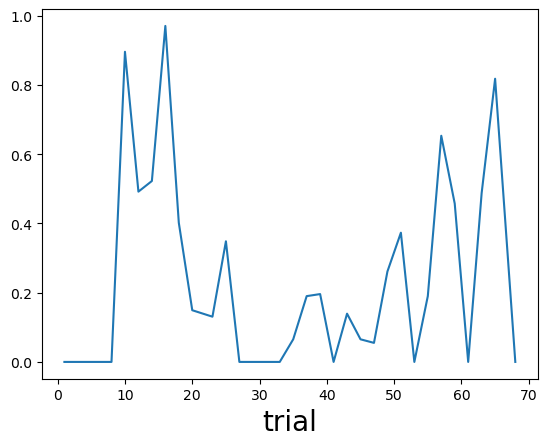

In [185]:
key=(0,0)
peak_inds=nmf_res['W_df_peaks_only_d'][key].index
X_normed_restacked_df_peaks_only = nmf_res['X_normed_restacked_df_d'][key].loc[peak_inds]
X_normed_restacked_df_peaks_only.loc[(37,1)].plot()

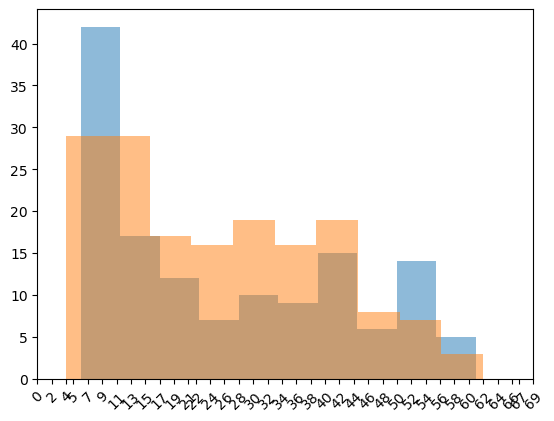

In [190]:
for key,change_pts_population in change_pts_population_d.items():
    all_change_pts = np.concatenate(change_pts_population.values)
    plt.hist(all_change_pts,alpha=0.5)
    _=plt.xticks(X_normed_restacked_df_peaks_only.columns,rotation=45)
    

In [161]:
X_d

{0.01: array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.]]),
 1: array([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 10: array([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1

In [186]:
# apply the above back to the synthetic data:
pen = 0.5 #0.1
change_pts_population_d = {}
for k,val in X_d.items():
    val = pd.DataFrame(val)
    %time change_pts_population_d[k]=val.apply(get_change_points_one_field,axis=1,args=(pen,)) 


CPU times: user 231 ms, sys: 0 ns, total: 231 ms
Wall time: 230 ms
CPU times: user 260 ms, sys: 0 ns, total: 260 ms
Wall time: 260 ms
CPU times: user 235 ms, sys: 0 ns, total: 235 ms
Wall time: 235 ms
CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 240 ms
CPU times: user 218 ms, sys: 0 ns, total: 218 ms
Wall time: 218 ms
CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 220 ms


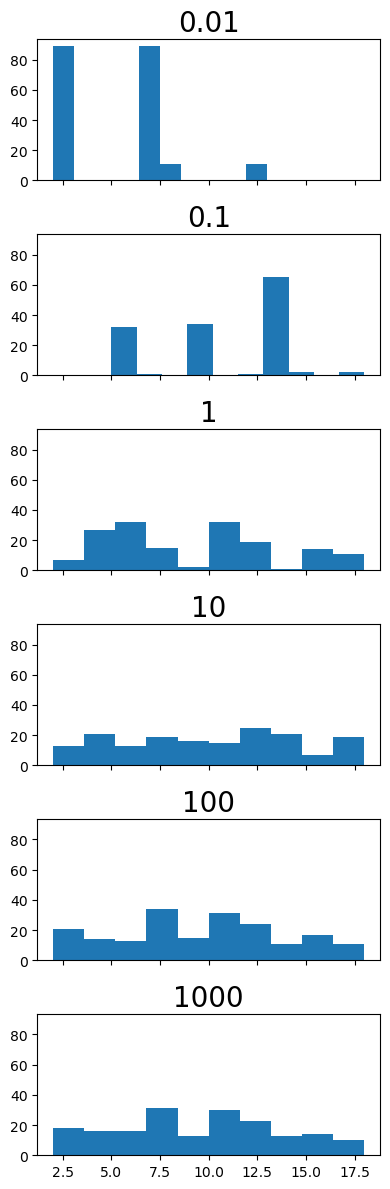

In [187]:
nplots = len(change_pts_population_d)
fig,axs=plt.subplots(nplots,1,figsize=(4,2*nplots),sharex=True,sharey=True)
for ii,(k,val) in enumerate(change_pts_population_d.items()):
    all_change_pts = np.concatenate(val.values)
    axs[ii].hist(all_change_pts)
    axs[ii].set_title(k)
#     _=axs.xticks(X_normed_restacked_df_peaks_only.columns,rotation=45)
plt.tight_layout()